$\Large \textbf{Technical Notebook}$

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

$\large \text{Getting the statistic of Iowa Salary Book}$

In [4]:
# Read in Iowa_Salary_Book dataset
df1 = pd.read_csv('D:\\download\\Materials\\State_of_Iowa_Salary_Book.csv',engine='python')
df1.columns

Index(['Fiscal Year', 'Department', 'Agency/Institution', 'Name', 'Gender',
       'Place of Residence', 'Position', 'Base Salary', 'Base Salary Date',
       'Total Salary Paid', 'Travel & Subsistence'],
      dtype='object')

In [15]:
# Get a slice of the dataset to make data processing more easy
df1.sort_values(by="Fiscal Year",ascending=False)
df1 = df1.drop(["Department",'Agency/Institution',"Name","Gender",'Place of Residence','Position','Base Salary Date',
          'Total Salary Paid', 'Travel & Subsistence'],axis=1)
df1.columns = ["Year","Base_Salary"]
df1 = df1[0:1000]

In [90]:
df1.to_csv("D:\\download\\Materials\\RevisedSalary.csv",index=False)

$\large \text{Processing entries in "Base_Salary" column to make them represent corresponding annual salary}$

In [17]:
for i in range(0,1000):
    if("TERMINATED" in df1["Base_Salary"][i]):
        df1["Base_Salary"][i] = float(17 * 40 * 2 * 27)
    elif("HR" in df1["Base_Salary"][i]):
        df1["Base_Salary"][i] = float(df1["Base_Salary"][i][0:len(df1["Base_Salary"][i])-3]) * 40 * 2 * 27    
    elif("BW" in df1["Base_Salary"][i]):
        index = df1["Base_Salary"][i].find(",")
        if(index!=-1):
            df1["Base_Salary"][i] = float(df1["Base_Salary"][i][0:index] + 
                                      df1["Base_Salary"][i][index+1:len(df1["Base_Salary"][i])-3]) * 27
        else:
            df1["Base_Salary"][i] = float(df1["Base_Salary"][i][0:len(df1["Base_Salary"][i])-3]) * 27  
    elif("YR" in df1["Base_Salary"][i]):
        index = df1["Base_Salary"][16].find(",")
        if(index!=-1):
            df1["Base_Salary"][i] = float(df1["Base_Salary"][i][0:index] + 
                                          df1["Base_Salary"][i][index+1:len(df1["Base_Salary"][i])-3])

<ipython-input-17-3cdbd191b9b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Base_Salary"][i] = float(17 * 40 * 2 * 27)
<ipython-input-17-3cdbd191b9b2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Base_Salary"][i] = float(df1["Base_Salary"][i][0:index] +
<ipython-input-17-3cdbd191b9b2>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Base_Salary"][i] = float(df1["Base_Salary"][i][0:index] +
<ipython-input-17-3cd

In [126]:
df1.to_csv("D:\\download\\Materials\\Exp.csv",index=False)

In [5]:
df1 = pd.read_csv('D:\\download\\Materials\\Exp.csv',engine='python')

$\large \text{Statistic of Iowa Salary Book}$

In [6]:
df1.describe()

,Year,Base_Salary
count,1000.0,1000.000000
mean,2007.0,48926.072000
std,0.0,20790.002466
min,2007.0,23565.600000
25%,2007.0,36720.000000
50%,2007.0,36720.000000
75%,2007.0,56435.400000
max,2007.0,144200.000000


$\large \text{Starting to Gain Some Insight of Ames Housing Dataset Through Statistic}$

In [3]:
#read in data
df = pd.read_csv('D:\\download\\Materials\\AmesHousing.csv')

$\large \text{Histogram of Sale Price}$

Skew:  1.7435000757376466


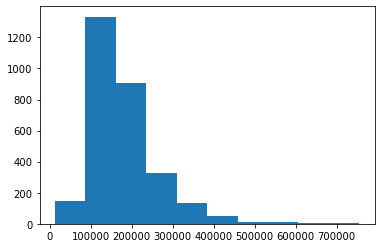

In [5]:
plt.hist(df.SalePrice)
print("Skew: ",df.SalePrice.skew())

$\large \text{Correlation Table}$

In [21]:
#getting the correlations between different features
correlation = df.corr(method ='pearson')
name = correlation.columns
name = name.drop(['SalePrice'])
correlation = correlation.drop(columns=name)
indexName = []
for i in range(0,39):
    if(correlation["SalePrice"][i]>0.5):
        indexName.append(correlation.index.values[i])
indexName.append("TotRms_AbvGrd")
indexName.remove("SalePrice")
print(indexName)

['Overall_Qual', 'Year_Built', 'Year_Remod_Add', 'Mas_Vnr_Area', 'Total_Bsmt_SF', '1st_Flr_SF', 'Gr_Liv_Area', 'Full_Bath', 'Garage_Yr_Blt', 'Garage_Cars', 'Garage_Area', 'TotRms_AbvGrd']


In [11]:
correlation["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall_Qual       0.799262
Gr_Liv_Area        0.706780
Garage_Cars        0.647877
Garage_Area        0.640401
Total_Bsmt_SF      0.632280
1st_Flr_SF         0.621676
Year_Built         0.558426
Full_Bath          0.545604
Year_Remod_Add     0.532974
Garage_Yr_Blt      0.526965
Mas_Vnr_Area       0.508285
TotRms_AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin_SF_1       0.432914
Lot_Frontage       0.357318
Wood_Deck_SF       0.327143
Open_Porch_SF      0.312951
Half_Bath          0.285056
Bsmt_Full_Bath     0.276050
2nd_Flr_SF         0.269373
Lot_Area           0.266549
Bsmt_Unf_SF        0.182855
Bedroom_AbvGr      0.143913
Screen_Porch       0.112151
Pool_Area          0.068403
Mo_Sold            0.035259
3Ssn_Porch         0.032225
BsmtFin_SF_2       0.005891
Misc_Val          -0.015691
Yr_Sold           -0.030569
Order             -0.031408
Bsmt_Half_Bath    -0.035835
Low_Qual_Fin_SF   -0.037660
MS_SubClass       -0.085092
Overall_Cond      -0

$\large \text{Overall Quality Graph}$

In [9]:
quality_pivot = df.pivot_table(index='Overall_Qual',
                  values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
Overall_Qual,
1,50150.0
2,57625.0
3,81200.0
4,105000.0
5,133000.0
6,159500.0
7,200000.0
8,264530.5
9,360000.0


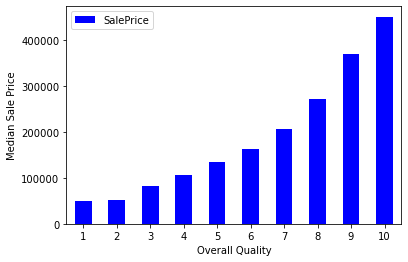

In [16]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

$\large \text{Above Ground Living Area Graph}$

Text(0, 0.5, 'Sale price')

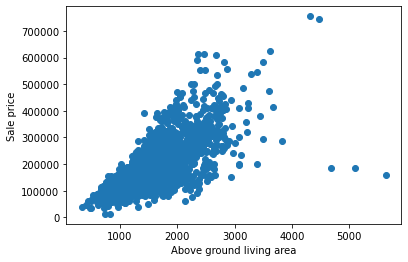

In [9]:
plt.scatter(df.Gr_Liv_Area,df.SalePrice)
plt.xlabel("Above ground living area")
plt.ylabel("Sale price")

$\large \text{Garage Cars Graph}$

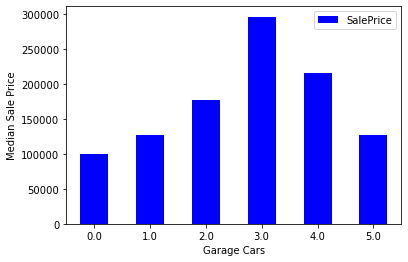

In [4]:
quality_pivot = df.pivot_table(index='Garage_Cars',
                  values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Garage Cars')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

$\large \text{Garage Area Graph}$

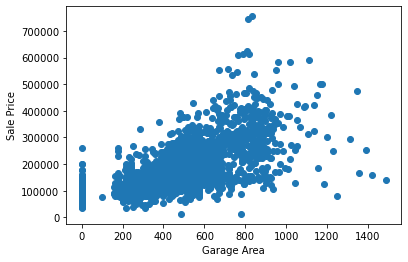

In [14]:
plt.scatter(x=df['Garage_Area'], y=df['SalePrice'])
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [27]:
df.columns

Index(['Order', 'PID', 'MS_SubClass', 'MS_Zoning', 'Lot_Area', 'Street',
       'Lot_Shape', 'Land_Contour', 'Utilities', 'Lot_Config', 'Land_Slope',
       'Neighborhood', 'Condition_1', 'Condition_2', 'Bldg_Type',
       'House_Style', 'Overall_Qual', 'Overall_Cond', 'Year_Built',
       'Year_Remod_Add', 'Roof_Style', 'Roof_Matl', 'Exterior_1st',
       'Exterior_2nd', 'Exter_Qual', 'Exter_Cond', 'Foundation', 'Heating',
       'Heating_QC', 'Central_Air', '1st_Flr_SF', '2nd_Flr_SF',
       'Low_Qual_Fin_SF', 'Gr_Liv_Area', 'Full_Bath', 'Half_Bath',
       'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Kitchen_Qual', 'TotRms_AbvGrd',
       'Functional', 'Fireplaces', 'Paved_Drive', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch',
       'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Yr_Sold', 'Sale_Type',
       'Sale_Condition', 'SalePrice', 'num_street', 'num_sale_cond'],
      dtype='object')

In [67]:
df.select_dtypes(exclude=[np.number]).dtypes

MS_Zoning         object
Street            object
Alley             object
Lot_Shape         object
Land_Contour      object
Utilities         object
Lot_Config        object
Land_Slope        object
Neighborhood      object
Condition_1       object
Condition_2       object
Bldg_Type         object
House_Style       object
Roof_Style        object
Roof_Matl         object
Exterior_1st      object
Exterior_2nd      object
Mas_Vnr_Type      object
Exter_Qual        object
Exter_Cond        object
Foundation        object
Bsmt _Qual        object
Bsmt _Cond        object
Bsmt_Exposure     object
BsmtFin_Type_1    object
BsmtFin_Type_2    object
Heating           object
Heating_QC        object
Central_Air       object
Electrical        object
Kitchen_Qual      object
Functional        object
Fireplace_Qu      object
Garage_Type       object
Garage_Finish     object
Garage_Qual       object
Garage_Cond       object
Paved_Drive       object
Pool_QC           object
Fence             object


$\large \text{Statistic of Nonnumeric Features}$

In [40]:
print (df.Street.value_counts(), "\n")

Pave    2918
Grvl      12
Name: Street, dtype: int64 



In [6]:
saleP = []
saleG = []
for e in range(0,2930):
    if(df["Street"][e]=="Pave"):
        saleP.append(df["SalePrice"][e])
    else:
        saleG.append(df["SalePrice"][e])

Min Pave Street Price 12789
Max Pave Street Price 755000


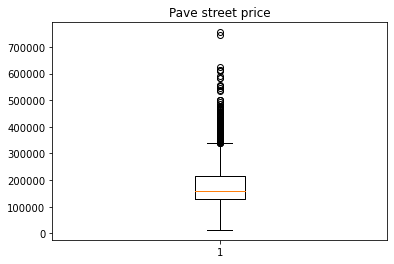

In [7]:
plt.boxplot(saleP)
plt.title("Pave street price")
print("Min Pave Street Price", min(saleP))
print("Max Pave Street Price", max(saleP))

Min Gravel Street Price 50138
Max Gravel Street Price 228950


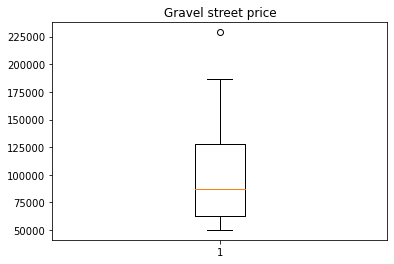

In [8]:
plt.boxplot(saleG)
plt.title("Gravel street price")
print("Min Gravel Street Price", min(saleG))
print("Max Gravel Street Price", max(saleG))

In [5]:
df['num_street'] = pd.get_dummies(df.Street, drop_first=True)

In [30]:
#verify the integrity of street counts
print (df.num_street.value_counts(), "\n")

1    2918
0      12
Name: num_street, dtype: int64 



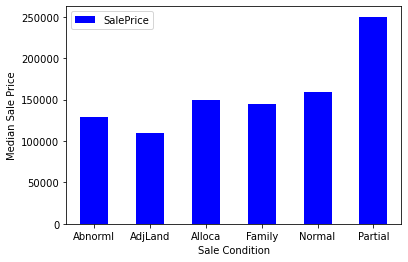

In [64]:
condition_pivot = df.pivot_table(index='Sale_Condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [5]:
df["num_sale_cond"] = df["Sale_Condition"]
for i in range(0,2930):
    if("Partial" in df["Sale_Condition"][i]):
        df["num_sale_cond"][i] = 0
    else:
        df["num_sale_cond"][i] = 1

<ipython-input-5-583a70ed48b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sale_cond"][i] = 1
<ipython-input-5-583a70ed48b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sale_cond"][i] = 0


In [71]:
#verify the integrity of sale conditions
print (df.num_sale_cond.value_counts(), "\n")

1    2685
0     245
Name: num_sale_cond, dtype: int64 



In [72]:
print (df.Sale_Condition.value_counts(), "\n")

Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: Sale_Condition, dtype: int64 



$\large \text{First Attempt}$

In [73]:
indexName.append("num_sale_cond")
indexName.append("num_street")

In [74]:
#A reminder that indexName represent features with more than 0.5 correlation with sale price
indexName

['Overall_Qual',
 'Year_Built',
 'Year_Remod_Add',
 'Mas_Vnr_Area',
 'Total_Bsmt_SF',
 '1st_Flr_SF',
 'Gr_Liv_Area',
 'Full_Bath',
 'Garage_Yr_Blt',
 'Garage_Cars',
 'Garage_Area',
 'TotRms_AbvGrd',
 'num_sale_cond',
 'num_street']

In [80]:
#Find out which entry has null value
df[indexName].isnull().sum()

Overall_Qual        0
Year_Built          0
Year_Remod_Add      0
Mas_Vnr_Area       23
Total_Bsmt_SF       1
1st_Flr_SF          0
Gr_Liv_Area         0
Full_Bath           0
Garage_Yr_Blt     159
Garage_Cars         1
Garage_Area         1
TotRms_AbvGrd       0
num_sale_cond       0
num_street          0
dtype: int64

In [82]:
df.Total_Bsmt_SF.mean

<bound method Series.mean of 0       1080.0
1        882.0
2       1329.0
3       2110.0
4        928.0
         ...  
2925    1003.0
2926     864.0
2927     912.0
2928    1389.0
2929     996.0
Name: Total_Bsmt_SF, Length: 2930, dtype: float64>

In [83]:
df.Total_Bsmt_SF.median

<bound method Series.median of 0       1080.0
1        882.0
2       1329.0
3       2110.0
4        928.0
         ...  
2925    1003.0
2926     864.0
2927     912.0
2928    1389.0
2929     996.0
Name: Total_Bsmt_SF, Length: 2930, dtype: float64>

In [32]:
null_table = df["Total_Bsmt_SF"].isnull()
for i in range(2930):
    if(null_table[i]==True):
        df["Total_Bsmt_SF"][i]=1080.0

<ipython-input-32-f2a0250628bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Total_Bsmt_SF"][i]=1080.0


In [96]:
df.Garage_Cars.mean

<bound method Series.mean of 0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
2925    2.0
2926    2.0
2927    0.0
2928    2.0
2929    3.0
Name: Garage_Cars, Length: 2930, dtype: float64>

In [33]:
null_table = df["Garage_Cars"].isnull()
for i in range(2930):
    if(null_table[i]==True):
        df["Garage_Cars"][i]=2

<ipython-input-33-086208506ab5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Garage_Cars"][i]=2


In [98]:
df.Garage_Area.mean

<bound method Series.mean of 0       528.0
1       730.0
2       312.0
3       522.0
4       482.0
        ...  
2925    588.0
2926    484.0
2927      0.0
2928    418.0
2929    650.0
Name: Garage_Area, Length: 2930, dtype: float64>

In [34]:
null_table = df['Garage_Area'].isnull()
for i in range(2930):
    if(null_table[i]==True):
        df["Garage_Area"][i]=528.0

<ipython-input-34-cff5c7086ca4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Garage_Area"][i]=528.0


In [103]:
#remove columns with null entry
indexName.remove("Mas_Vnr_Area")
indexName.remove("Garage_Yr_Blt")

In [104]:
indexName

['Overall_Qual',
 'Year_Built',
 'Year_Remod_Add',
 'Total_Bsmt_SF',
 '1st_Flr_SF',
 'Gr_Liv_Area',
 'Full_Bath',
 'Garage_Cars',
 'Garage_Area',
 'TotRms_AbvGrd',
 'num_sale_cond',
 'num_street']

In [105]:
#verify if there're still any null values
df[indexName].isnull().sum().sum()==0

True

In [106]:
X = df[indexName]
y = df["SalePrice"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=0, test_size=.33)

In [108]:
lr = linear_model.LinearRegression()

In [109]:
model = lr.fit(X_train, y_train)

$\text{Finding out error of the model}$

In [110]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.772196845087427


In [118]:
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))
print("MAE is :\n",mean_absolute_error(y_test, predictions))

RMSE is: 
 1552839760.804605
MAE is :
 24609.97246408946


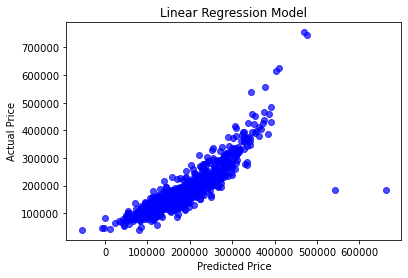

In [115]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

$\large \text{First attempt: Part II}$

In [6]:
#create a new data frame with all te numberic features in df
new_df = df.select_dtypes(include=[np.number])
new_df["num_sale"] = df["num_sale_cond"]
new_df.columns

<ipython-input-6-5bdb89a71260>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["num_sale"] = df["num_sale_cond"]


Index(['Order', 'PID', 'MS_SubClass', 'Lot_Frontage', 'Lot_Area',
       'Overall_Qual', 'Overall_Cond', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd',
       'Fireplaces', 'Garage_Yr_Blt', 'Garage_Cars', 'Garage_Area',
       'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', '3Ssn_Porch',
       'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Yr_Sold',
       'SalePrice', 'num_sale'],
      dtype='object')

In [7]:
#checking null values
new_df.isnull().sum()

Order                0
PID                  0
MS_SubClass          0
Lot_Frontage       490
Lot_Area             0
Overall_Qual         0
Overall_Cond         0
Year_Built           0
Year_Remod_Add       0
Mas_Vnr_Area        23
BsmtFin_SF_1         1
BsmtFin_SF_2         1
Bsmt_Unf_SF          1
Total_Bsmt_SF        1
1st_Flr_SF           0
2nd_Flr_SF           0
Low_Qual_Fin_SF      0
Gr_Liv_Area          0
Bsmt_Full_Bath       2
Bsmt_Half_Bath       2
Full_Bath            0
Half_Bath            0
Bedroom_AbvGr        0
Kitchen_AbvGr        0
TotRms_AbvGrd        0
Fireplaces           0
Garage_Yr_Blt      159
Garage_Cars          1
Garage_Area          1
Wood_Deck_SF         0
Open_Porch_SF        0
Enclosed_Porch       0
3Ssn_Porch           0
Screen_Porch         0
Pool_Area            0
Misc_Val             0
Mo_Sold              0
Yr_Sold              0
SalePrice            0
num_sale             0
dtype: int64

In [11]:
correlation["SalePrice"].sort_values(ascending=False)

SalePrice          1.000000
Overall_Qual       0.799262
Gr_Liv_Area        0.706780
Garage_Cars        0.647877
Garage_Area        0.640401
Total_Bsmt_SF      0.632280
1st_Flr_SF         0.621676
Year_Built         0.558426
Full_Bath          0.545604
Year_Remod_Add     0.532974
Garage_Yr_Blt      0.526965
Mas_Vnr_Area       0.508285
TotRms_AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin_SF_1       0.432914
Lot_Frontage       0.357318
Wood_Deck_SF       0.327143
Open_Porch_SF      0.312951
Half_Bath          0.285056
Bsmt_Full_Bath     0.276050
2nd_Flr_SF         0.269373
Lot_Area           0.266549
Bsmt_Unf_SF        0.182855
Bedroom_AbvGr      0.143913
Screen_Porch       0.112151
Pool_Area          0.068403
Mo_Sold            0.035259
3Ssn_Porch         0.032225
BsmtFin_SF_2       0.005891
Misc_Val          -0.015691
Yr_Sold           -0.030569
Order             -0.031408
Bsmt_Half_Bath    -0.035835
Low_Qual_Fin_SF   -0.037660
MS_SubClass       -0.085092
Overall_Cond      -0

In [76]:
#drop features with null values and low correlation 
new_df = new_df.drop(columns=["Order","PID","Bsmt_Half_Bath","BsmtFin_SF_2","Bsmt_Unf_SF"])

In [78]:
df.Lot_Frontage.mean

<bound method Series.mean of 0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926    141.0
2927     62.0
2928     77.0
2929     74.0
Name: Lot_Frontage, Length: 2930, dtype: float64>

In [80]:
null_table = df['Lot_Frontage'].isnull()
for i in range(2930):
    if(null_table[i]==True):
        new_df["Lot_Frontage"][i]=141.0

In [81]:
df.Mas_Vnr_Area.mean

<bound method Series.mean of 0       112.0
1         0.0
2       108.0
3         0.0
4         0.0
        ...  
2925      0.0
2926      0.0
2927      0.0
2928      0.0
2929     94.0
Name: Mas_Vnr_Area, Length: 2930, dtype: float64>

In [82]:
null_table = df['Mas_Vnr_Area'].isnull()
for i in range(2930):
    if(null_table[i]==True):
        new_df["Mas_Vnr_Area"][i]=112.0

<ipython-input-82-3ad5faf4c253>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Mas_Vnr_Area"][i]=112.0


In [84]:
df.BsmtFin_SF_1.mean

<bound method Series.mean of 0        639.0
1        468.0
2        923.0
3       1065.0
4        791.0
         ...  
2925     819.0
2926     301.0
2927     337.0
2928    1071.0
2929     758.0
Name: BsmtFin_SF_1, Length: 2930, dtype: float64>

In [85]:
null_table = df['BsmtFin_SF_1'].isnull()
for i in range(2930):
    if(null_table[i]==True):
        new_df["BsmtFin_SF_1"][i]=639.0

<ipython-input-85-79c7b0230b84>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["BsmtFin_SF_1"][i]=639.0


In [87]:
df.Bsmt_Full_Bath.mean

<bound method Series.mean of 0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
2925    1.0
2926    1.0
2927    0.0
2928    1.0
2929    0.0
Name: Bsmt_Full_Bath, Length: 2930, dtype: float64>

In [88]:
null_table = df['Bsmt_Full_Bath'].isnull()
for i in range(2930):
    if(null_table[i]==True):
        new_df["Bsmt_Full_Bath"][i]=1.0

<ipython-input-88-c746c9b62773>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Bsmt_Full_Bath"][i]=1.0


In [90]:
df.Garage_Yr_Blt.mean

<bound method Series.mean of 0       1960.0
1       1961.0
2       1958.0
3       1968.0
4       1997.0
         ...  
2925    1984.0
2926    1983.0
2927       NaN
2928    1975.0
2929    1993.0
Name: Garage_Yr_Blt, Length: 2930, dtype: float64>

In [91]:
null_table = df['Garage_Yr_Blt'].isnull()
for i in range(2930):
    if(null_table[i]==True):
        new_df["Garage_Yr_Blt"][i]=1960

<ipython-input-91-4b46a6b0d1e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Garage_Yr_Blt"][i]=1960


In [92]:
#verify all the null values are gone
new_df.isnull().sum().sum()==0

True

In [96]:
indexName = new_df.columns.drop("SalePrice")
X = new_df[indexName]
y = new_df["SalePrice"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=0, test_size=.33)

In [98]:
lr = linear_model.LinearRegression()

In [99]:
model = lr.fit(X_train, y_train)

$\text{Finding out error of the model}$

In [100]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.7886270850757143


In [101]:
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))
print("MAE is :\n",mean_absolute_error(y_test, predictions))

RMSE is: 
 1440841619.5006974
MAE is :
 21435.35041946281


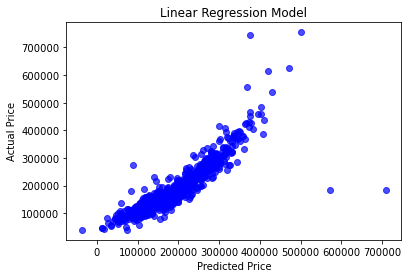

In [102]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

$\large \text{First Attempt: Part III}$

In [7]:
#Create a new data frame with all the numerical features of df
another = df.select_dtypes(include=[np.number])
another["num_sale"] = df["num_sale_cond"]
another

<ipython-input-7-efe092856292>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  another["num_sale"] = df["num_sale_cond"]


,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Mas_Vnr_Area,...,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice,num_street,num_sale
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,0,0,0,0,0,5,2010,215000,1,1
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,0,0,120,0,0,6,2010,105000,1,1
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,0,0,0,0,12500,6,2010,172000,1,1
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,4,2010,244000,1,1
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,0,0,0,0,0,3,2010,189900,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,0,0,0,0,0,3,2006,142500,1,1
2926,2927,923276100,20,NaN,8885,5,5,1983,1983,0.0,...,0,0,0,0,0,6,2006,131000,1,1
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,0,0,0,0,700,7,2006,132000,1,1
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,0,0,0,0,0,4,2006,170000,1,1


In [8]:
#drop rows with null values
another = another.dropna(axis=0,how='any')

In [9]:
another.columns

Index(['Order', 'PID', 'MS_SubClass', 'Lot_Frontage', 'Lot_Area',
       'Overall_Qual', 'Overall_Cond', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF',
       'Gr_Liv_Area', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath',
       'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd',
       'Fireplaces', 'Garage_Yr_Blt', 'Garage_Cars', 'Garage_Area',
       'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', '3Ssn_Porch',
       'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Yr_Sold',
       'SalePrice', 'num_street', 'num_sale'],
      dtype='object')

In [10]:
another = another.drop(["Order","PID"],axis=1)
another.columns

Index(['MS_SubClass', 'Lot_Frontage', 'Lot_Area', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod_Add', 'Mas_Vnr_Area',
       'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area',
       'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath',
       'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces',
       'Garage_Yr_Blt', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch',
       'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Yr_Sold', 'SalePrice',
       'num_street', 'num_sale'],
      dtype='object')

In [11]:
#check if there're any null values
another.isnull().sum().sum()==0

True

In [161]:
indexName = another.columns.drop("SalePrice")
X = another[indexName]
y = another["SalePrice"]

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=0, test_size=.4)

In [163]:
lr = linear_model.LinearRegression()

In [164]:
model = lr.fit(X_train, y_train)

$\text{Finding out error of the model}$

In [165]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8388815815916616


In [166]:
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))
print("MAE is :\n",mean_absolute_error(y_test, predictions))

RMSE is: 
 1060663409.3985114
MAE is :
 21320.01345827645


$\large \text{First Attempt: Part IV}$

In [12]:
indexName = another.columns.drop("SalePrice")
X = another[indexName]
y = np.log(another["SalePrice"])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=0, test_size=.4)

In [14]:
lr = linear_model.LinearRegression()

In [15]:
model = lr.fit(X_train, y_train)

In [16]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8820892372591936


In [17]:
predictions = model.predict(X_test)
print ('RMSE is: \n', mean_squared_error(y_test, predictions))
print("MAE is :\n",mean_absolute_error(y_test, predictions))

RMSE is: 
 0.01934581059437493
MAE is :
 0.09429880983660362


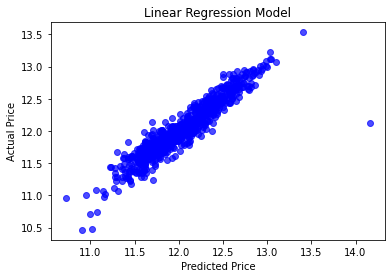

In [23]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') 
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

$\large \text{Histogram of log(Sale Price)}$

(array([  2.,   0.,   3.,  18., 115., 782., 825., 387., 127.,  15.]),
 array([ 9.45634071,  9.86415394, 10.27196717, 10.6797804 , 11.08759363,
        11.49540687, 11.9032201 , 12.31103333, 12.71884656, 13.1266598 ,
        13.53447303]),
 <a list of 10 Patch objects>)

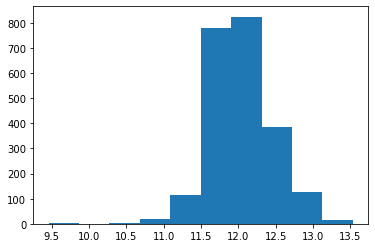

In [18]:
plt.hist(y)

In [26]:
type(predictions)

numpy.ndarray

In [ ]:
#https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37
#explain why skew data is bad for accuracy
#ppt generator
#https://rise.readthedocs.io/en/stable/
#example
#https://youtu.be/sXyFa_r1nxA
#textbook
#http://vmls-book.stanford.edu/vmls.pdf